In [1]:
#pip install pytorch-tabnet

  Obtaining dependency information for pytorch-tabnet from https://files.pythonhosted.org/packages/0f/92/ed98b89b7cf5661656daa4cc88e578f712eb5eae41b8f46a56c1ece3a895/pytorch_tabnet-4.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 152.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 讀取 CSV 文件
df = pd.read_csv('/Users/ccit0915/Desktop/kaggle/客戶流失預測/WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='utf-8')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


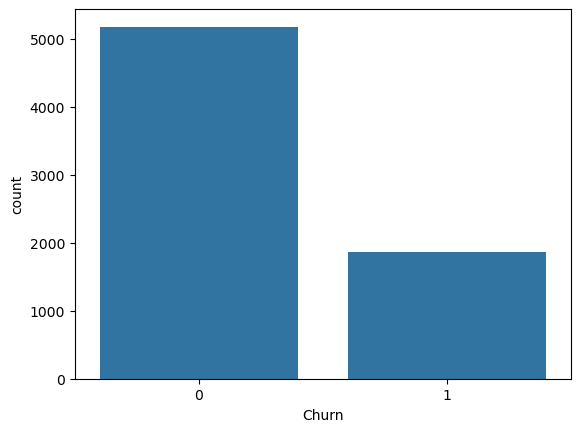

In [3]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
sns.countplot(x='Churn', data=df)
plt.show()

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.drop(columns=['customerID'], inplace=True)

In [7]:
import pandas as pd

# 需要轉換的二元特徵
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", 
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies"]

# 統一 "No internet service" 為 "No"
df[binary_cols] = df[binary_cols].replace("No internet service", "No")

# **使用 replace() 轉換 Yes/No，顯式使用 astype(int) 來確保數據類型**
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)

# **修正性別轉換**
df["gender"] = df["gender"].map({"Male": 1, "Female": 0}).astype(int)

# **修正 MultipleLines（顯式轉換型別）**
df["MultipleLines"] = df["MultipleLines"].replace(
    {"No": 0, "Yes": 1, "No phone service": 0}
).astype(int)

# **轉換 TotalCharges 為數值，並填補 NaN**
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)
pd.set_option('future.no_silent_downcasting', True)

# 進行 One-Hot Encoding
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# 轉換布林值為整數
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool', 'uint8']).columns})

/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_62222/1302465994.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)
/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_62222/1302465994.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"] = df["MultipleLines"].replace(


In [9]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 讀取數據
X = df.drop(columns=['Churn'])  # 特徵變數
y = df['Churn']  # 目標變數

# 切分數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 TabNet 模型
model = TabNetClassifier()

# 訓練模型
model.fit(X_train.values, y_train.values)

# 預測
y_pred = model.predict(X_test.values)

# 計算四個評估指標
accuracy_tabnet = accuracy_score(y_test, y_pred)
precision_tabnet = precision_score(y_test, y_pred)
recall_tabnet = recall_score(y_test, y_pred)
f1_tabnet = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (tabnet) Performance:")
print(f"Accuracy: {accuracy_tabnet:.4f}")
print(f"Precision: {precision_tabnet:.4f}")
print(f"Recall: {recall_tabnet:.4f}")
print(f"F1 Score: {f1_tabnet:.4f}")

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.71299 |  0:00:00s
epoch 1  | loss: 0.5674  |  0:00:00s
epoch 2  | loss: 0.51805 |  0:00:00s
epoch 3  | loss: 0.5049  |  0:00:00s
epoch 4  | loss: 0.48903 |  0:00:00s
epoch 5  | loss: 0.48679 |  0:00:00s
epoch 6  | loss: 0.47227 |  0:00:00s
epoch 7  | loss: 0.46948 |  0:00:00s
epoch 8  | loss: 0.46628 |  0:00:00s
epoch 9  | loss: 0.45807 |  0:00:00s
epoch 10 | loss: 0.46194 |  0:00:01s
epoch 11 | loss: 0.45077 |  0:00:01s
epoch 12 | loss: 0.45554 |  0:00:01s
epoch 13 | loss: 0.45282 |  0:00:01s
epoch 14 | loss: 0.44738 |  0:00:01s
epoch 15 | loss: 0.44626 |  0:00:01s
epoch 16 | loss: 0.44212 |  0:00:01s
epoch 17 | loss: 0.44397 |  0:00:01s
epoch 18 | loss: 0.4447  |  0:00:01s
epoch 19 | loss: 0.44364 |  0:00:01s
epoch 20 | loss: 0.4333  |  0:00:02s
epoch 21 | loss: 0.42877 |  0:00:02s
epoch 22 | loss: 0.4286  |  0:00:02s
epoch 23 | loss: 0.42637 |  0:00:02s
epoch 24 | loss: 0.42408 |  0:00:02s
epoch 25 | loss: 0.42651 |  0:00:02s
epoch 26 | loss: 0.42405 |  0:00:02s
e

In [11]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import contextlib

# 三組特徵
selected_features_8 = {'Contract_Two year', 'MonthlyCharges', 
                         'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check',
                         'TotalCharges', "SeniorCitizen", "Contract_One year"}

selected_features_cPFI = {"TotalCharges", "tenure", "InternetService_Fiber optic", "SeniorCitizen",
    "gender", "MultipleLines", "PaperlessBilling", "PaymentMethod_Electronic check"}

selected_features_FK_RFE = ['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
                            'InternetService_Fiber optic', 'InternetService_No', 
                            'Contract_Two year', 'PaymentMethod_Electronic check']

# 讀取數據
X = df.drop(columns=['Churn'])
y = df['Churn']

# 切分數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 contextlib.redirect_stdout 來禁用輸出
with contextlib.redirect_stdout(sys.stdout):
    # 訓練 TabNet 讓它選擇特徵
    tabnet_full = TabNetClassifier()
    tabnet_full.fit(X_train.values, y_train.values)

# 取得特徵重要性
feature_importance = tabnet_full.feature_importances_

# 取得最重要的 8 個特徵
top_8_features = np.array(X.columns)[np.argsort(feature_importance)[-8:]]
selected_features_tabnet = set(top_8_features)

print(f"TabNet 選出的 8 個特徵: {selected_features_tabnet}")

# 訓練與比較不同特徵組合
def train_evaluate_tabnet(features, X, y, name):
    X_selected = X[list(features)]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    model = TabNetClassifier()
    
    with contextlib.redirect_stdout(sys.stdout):  # 禁用訓練過程輸出
        model.fit(X_train.values, y_train.values)

    y_pred = model.predict(X_test.values)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n=== {name} 特徵組 ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1

# 訓練與比較不同特徵組合
results = {}
results["selected_features_8"] = train_evaluate_tabnet(selected_features_8, X, y, "selected_features_8")
results["selected_features_cPFI"] = train_evaluate_tabnet(selected_features_cPFI, X, y, "selected_features_cPFI")
results["selected_features_FK_RFE"] = train_evaluate_tabnet(selected_features_FK_RFE, X, y, "selected_features_FK_RFE")
results["selected_features_tabnet"] = train_evaluate_tabnet(selected_features_tabnet, X, y, "selected_features_tabnet")

# 輸出比較結果
print("\n=== 🏆 最終比較結果 ===")
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"])
print(df_results)

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.71299 |  0:00:00s
epoch 1  | loss: 0.5674  |  0:00:00s
epoch 2  | loss: 0.51805 |  0:00:00s
epoch 3  | loss: 0.5049  |  0:00:00s
epoch 4  | loss: 0.48903 |  0:00:00s
epoch 5  | loss: 0.48679 |  0:00:00s
epoch 6  | loss: 0.47227 |  0:00:00s
epoch 7  | loss: 0.46948 |  0:00:00s
epoch 8  | loss: 0.46628 |  0:00:00s
epoch 9  | loss: 0.45807 |  0:00:00s
epoch 10 | loss: 0.46194 |  0:00:00s
epoch 11 | loss: 0.45077 |  0:00:01s
epoch 12 | loss: 0.45554 |  0:00:01s
epoch 13 | loss: 0.45282 |  0:00:01s
epoch 14 | loss: 0.44738 |  0:00:01s
epoch 15 | loss: 0.44626 |  0:00:01s
epoch 16 | loss: 0.44212 |  0:00:01s
epoch 17 | loss: 0.44397 |  0:00:01s
epoch 18 | loss: 0.4447  |  0:00:01s
epoch 19 | loss: 0.44364 |  0:00:01s
epoch 20 | loss: 0.4333  |  0:00:01s
epoch 21 | loss: 0.42877 |  0:00:01s
epoch 22 | loss: 0.4286  |  0:00:01s
epoch 23 | loss: 0.42637 |  0:00:02s
epoch 24 | loss: 0.42408 |  0:00:02s
epoch 25 | loss: 0.42651 |  0:00:02s
epoch 26 | loss: 0.42405 |  0:00:02s
e

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.4568  |  0:00:00s
epoch 2  | loss: 0.44784 |  0:00:00s
epoch 3  | loss: 0.43748 |  0:00:00s
epoch 4  | loss: 0.44223 |  0:00:00s
epoch 5  | loss: 0.43656 |  0:00:00s
epoch 6  | loss: 0.43213 |  0:00:00s
epoch 7  | loss: 0.42786 |  0:00:00s
epoch 8  | loss: 0.43247 |  0:00:00s
epoch 9  | loss: 0.43205 |  0:00:00s
epoch 10 | loss: 0.42768 |  0:00:00s
epoch 11 | loss: 0.42728 |  0:00:00s
epoch 12 | loss: 0.42831 |  0:00:01s
epoch 13 | loss: 0.42274 |  0:00:01s
epoch 14 | loss: 0.42537 |  0:00:01s
epoch 15 | loss: 0.42699 |  0:00:01s
epoch 16 | loss: 0.42345 |  0:00:01s
epoch 17 | loss: 0.42391 |  0:00:01s
epoch 18 | loss: 0.42228 |  0:00:01s
epoch 19 | loss: 0.42217 |  0:00:01s
epoch 20 | loss: 0.4303  |  0:00:01s
epoch 21 | loss: 0.42844 |  0:00:01s
epoch 22 | loss: 0.42675 |  0:00:01s
epoch 23 | loss: 0.42042 |  0:00:01s
epoch 24 | loss: 0.42563 |  0:00:01s
epoch 25 | loss: 0.42435 |  0:00:02s
epoch 26 | loss: 0.42673 |  0:00:02s
epoch 27 | loss: 0.42613 |  0:00:02s
e

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.59305 |  0:00:00s
epoch 1  | loss: 0.494   |  0:00:00s
epoch 2  | loss: 0.48126 |  0:00:00s
epoch 3  | loss: 0.46556 |  0:00:00s
epoch 4  | loss: 0.47064 |  0:00:00s
epoch 5  | loss: 0.46411 |  0:00:00s
epoch 6  | loss: 0.45872 |  0:00:00s
epoch 7  | loss: 0.45147 |  0:00:00s
epoch 8  | loss: 0.45627 |  0:00:00s
epoch 9  | loss: 0.45156 |  0:00:00s
epoch 10 | loss: 0.4493  |  0:00:00s
epoch 11 | loss: 0.4473  |  0:00:00s
epoch 12 | loss: 0.44059 |  0:00:01s
epoch 13 | loss: 0.43597 |  0:00:01s
epoch 14 | loss: 0.44211 |  0:00:01s
epoch 15 | loss: 0.43961 |  0:00:01s
epoch 16 | loss: 0.43961 |  0:00:01s
epoch 17 | loss: 0.44237 |  0:00:01s
epoch 18 | loss: 0.43982 |  0:00:01s
epoch 19 | loss: 0.43702 |  0:00:01s
epoch 20 | loss: 0.44345 |  0:00:01s
epoch 21 | loss: 0.4418  |  0:00:01s
epoch 22 | loss: 0.44404 |  0:00:01s
epoch 23 | loss: 0.43316 |  0:00:01s
epoch 24 | loss: 0.43739 |  0:00:01s
epoch 25 | loss: 0.43401 |  0:00:01s
epoch 26 | loss: 0.44044 |  0:00:01s
e

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.51959 |  0:00:00s
epoch 1  | loss: 0.46325 |  0:00:00s
epoch 2  | loss: 0.44945 |  0:00:00s
epoch 3  | loss: 0.44228 |  0:00:00s
epoch 4  | loss: 0.44006 |  0:00:00s
epoch 5  | loss: 0.43941 |  0:00:00s
epoch 6  | loss: 0.43374 |  0:00:00s
epoch 7  | loss: 0.4285  |  0:00:00s
epoch 8  | loss: 0.42854 |  0:00:00s
epoch 9  | loss: 0.43614 |  0:00:00s
epoch 10 | loss: 0.42992 |  0:00:00s
epoch 11 | loss: 0.42668 |  0:00:00s
epoch 12 | loss: 0.42508 |  0:00:01s
epoch 13 | loss: 0.42066 |  0:00:01s
epoch 14 | loss: 0.42479 |  0:00:01s
epoch 15 | loss: 0.42505 |  0:00:01s
epoch 16 | loss: 0.42513 |  0:00:01s
epoch 17 | loss: 0.42174 |  0:00:01s
epoch 18 | loss: 0.4202  |  0:00:01s
epoch 19 | loss: 0.4202  |  0:00:01s
epoch 20 | loss: 0.42418 |  0:00:01s
epoch 21 | loss: 0.42493 |  0:00:01s
epoch 22 | loss: 0.42674 |  0:00:01s
epoch 23 | loss: 0.41846 |  0:00:01s
epoch 24 | loss: 0.42495 |  0:00:01s
epoch 25 | loss: 0.42258 |  0:00:01s
epoch 26 | loss: 0.42571 |  0:00:01s
e

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 2  | loss: 0.45511 |  0:00:00s
epoch 3  | loss: 0.44237 |  0:00:00s
epoch 4  | loss: 0.44938 |  0:00:00s
epoch 5  | loss: 0.44497 |  0:00:00s
epoch 6  | loss: 0.43657 |  0:00:00s
epoch 7  | loss: 0.43399 |  0:00:00s
epoch 8  | loss: 0.43587 |  0:00:00s
epoch 9  | loss: 0.4373  |  0:00:00s
epoch 10 | loss: 0.43096 |  0:00:00s
epoch 11 | loss: 0.42928 |  0:00:00s
epoch 12 | loss: 0.42997 |  0:00:00s
epoch 13 | loss: 0.42417 |  0:00:00s
epoch 14 | loss: 0.42917 |  0:00:01s
epoch 15 | loss: 0.42553 |  0:00:01s
epoch 16 | loss: 0.42782 |  0:00:01s
epoch 17 | loss: 0.42534 |  0:00:01s
epoch 18 | loss: 0.42444 |  0:00:01s
epoch 19 | loss: 0.42394 |  0:00:01s
epoch 20 | loss: 0.43225 |  0:00:01s
epoch 21 | loss: 0.42891 |  0:00:01s
epoch 22 | loss: 0.42945 |  0:00:01s
epoch 23 | loss: 0.42423 |  0:00:01s
epoch 24 | loss: 0.42778 |  0:00:01s
epoch 25 | loss: 0.42051 |  0:00:01s
epoch 26 | loss: 0.42853 |  0:00:01s
epoch 27 | loss: 0.4244  |  0:00:02s
epoch 28 | loss: 0.42057 |  0:00:02s
e

Accuracy: 0.8147622427253371
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

Confusion Matrix:
 [[943  93]
 [168 205]]


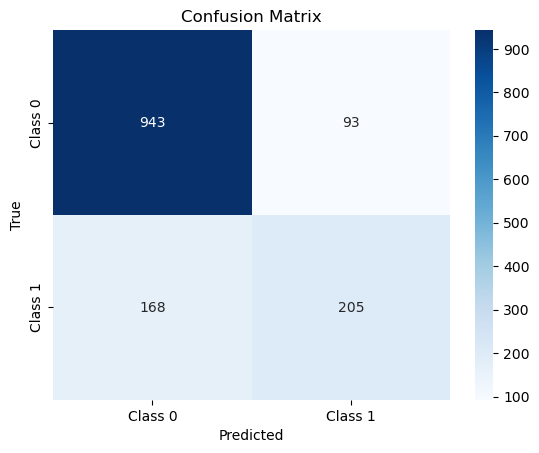

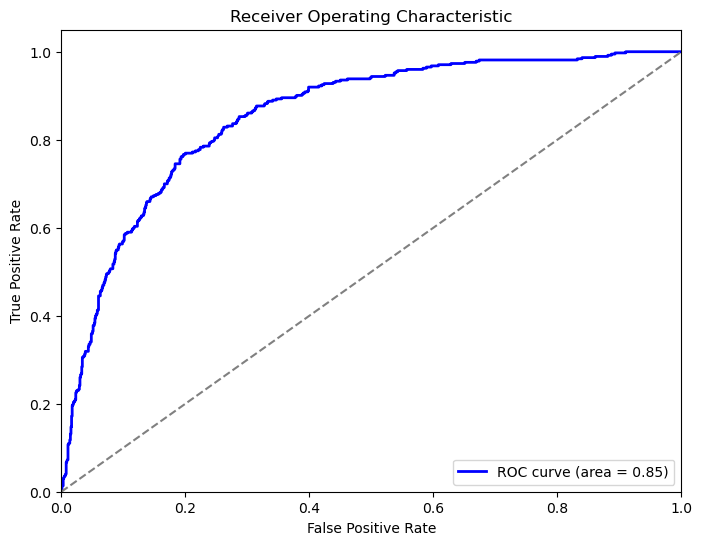

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# 評估結果
print("Accuracy:", accuracy_score(y_test_np, y_pred))
print("Classification Report:\n", classification_report(y_test_np, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred))

# 可視化混淆矩陣
conf_matrix = confusion_matrix(y_test_np, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC 和 AUC 曲線
fpr, tpr, thresholds = roc_curve(y_test_np, y_proba[:, 1])  # 使用正類的預測機率
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [73]:
# 檢查到底傳入了多少樣本
#print(X_test.shape)
#print(X_test.values.shape)

# 重新初始化 explainer，明確給整個測試集
#explainer = shap.Explainer(model.predict, X_test.values)
#shap_values = explainer(X_test.values)
#print(shap_values.shape)

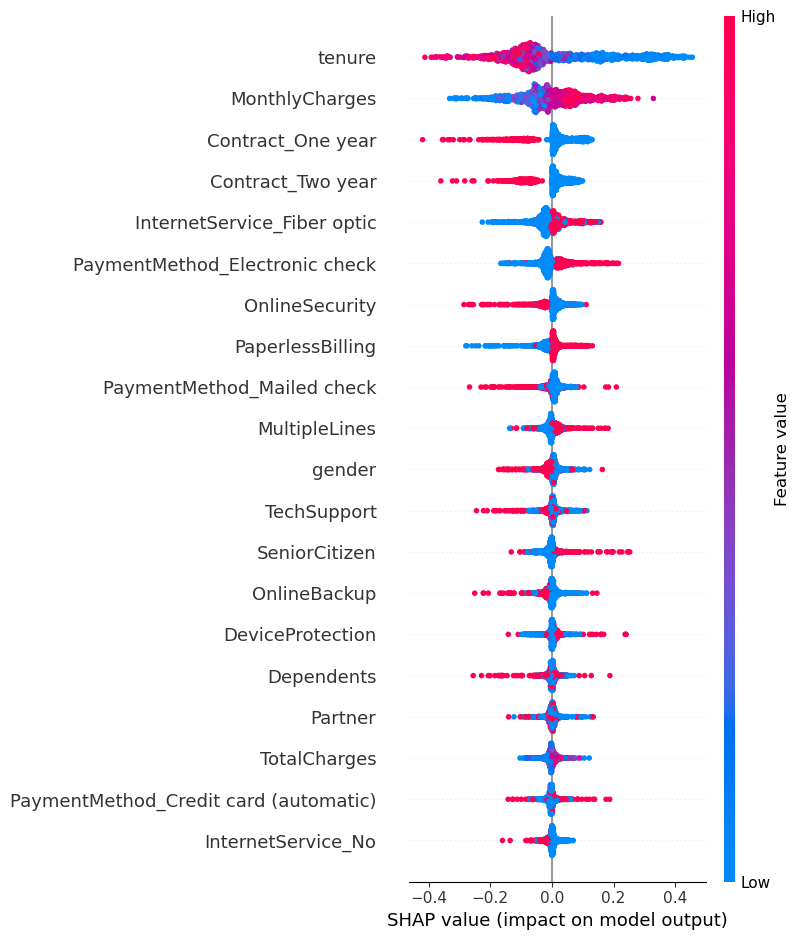

In [75]:
shap.summary_plot(shap_values.values, X_test)  # 查看整體特徵貢獻

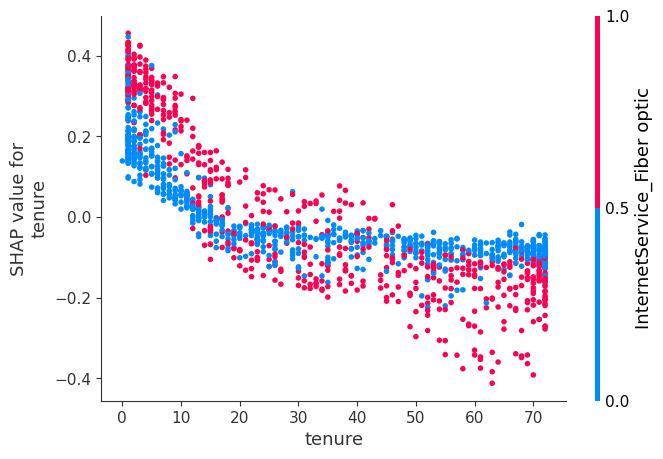

In [77]:
shap.dependence_plot('tenure', shap_values.values, X_test)  # 可視化 'tenure' 特徵的影響

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np

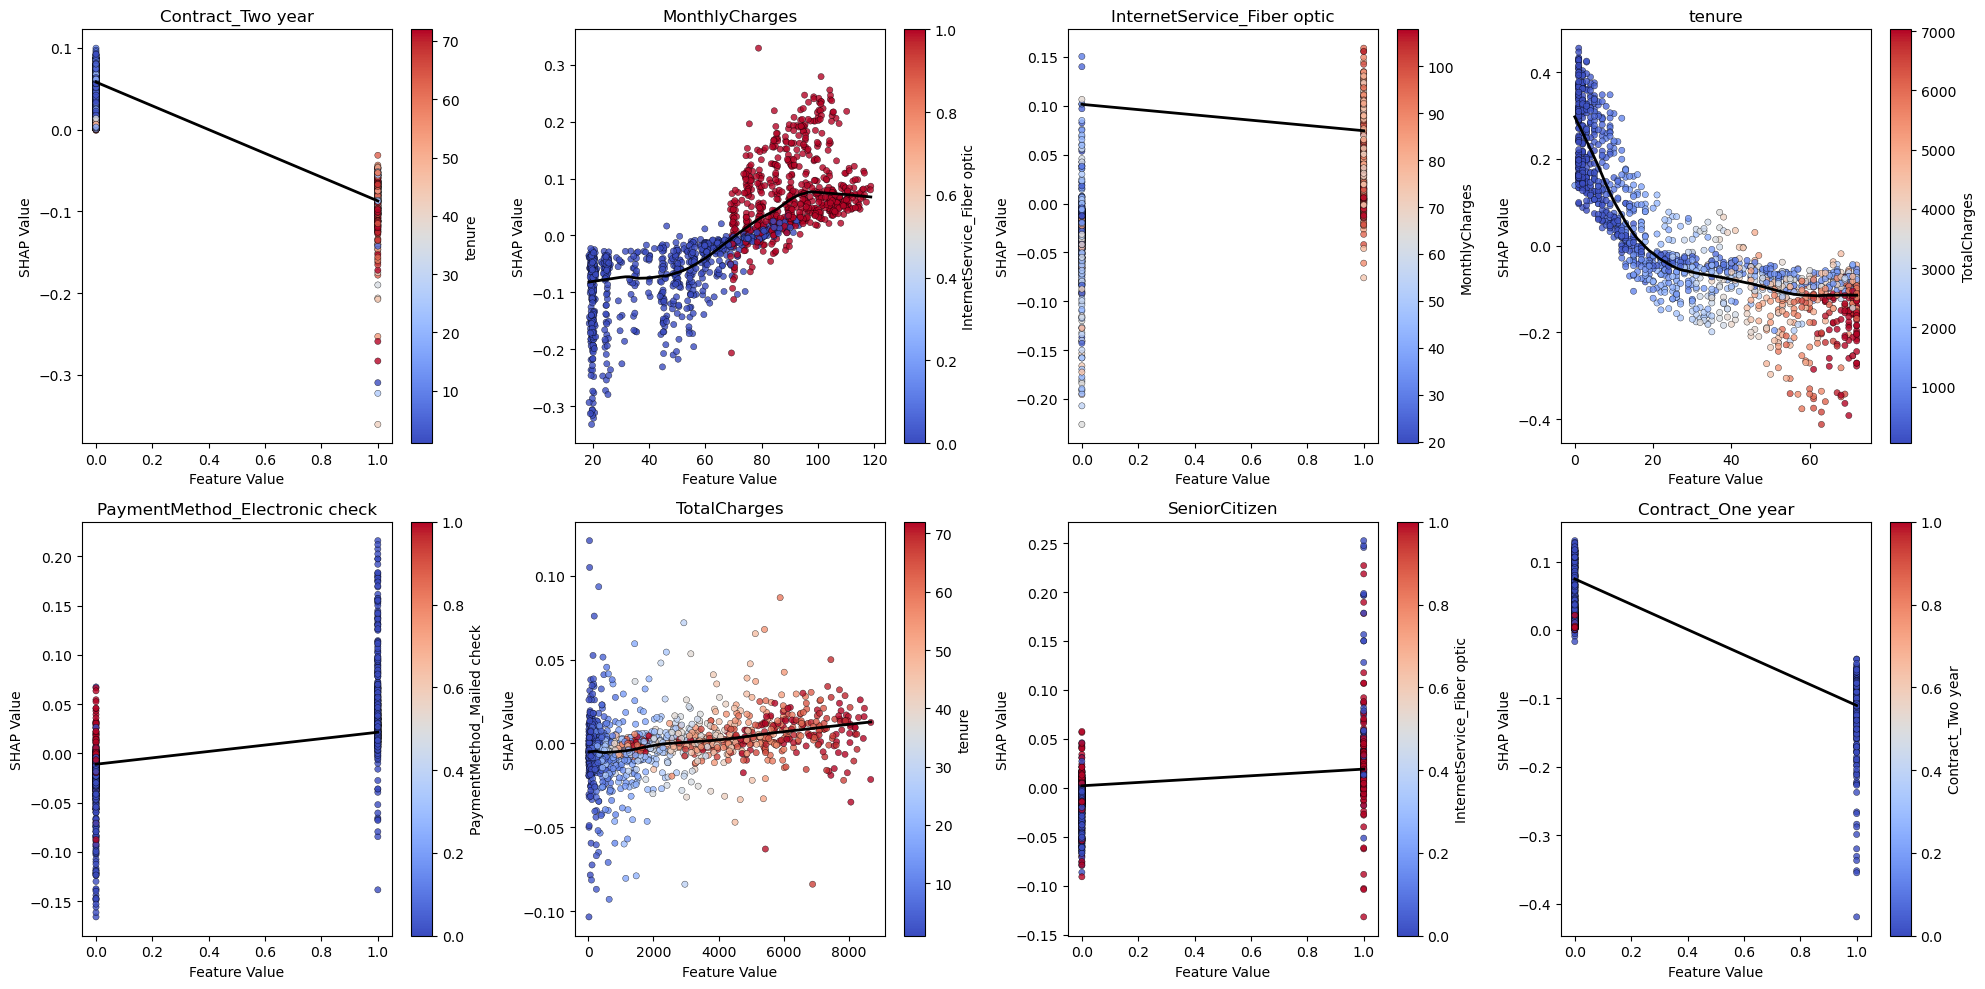

In [104]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.colors import Normalize
from matplotlib import cm

# 選定特徵
selected_features_8 = ['Contract_Two year', 'MonthlyCharges', 
                       'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check',
                       'TotalCharges', "SeniorCitizen", "Contract_One year"]

# 建立子圖
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(selected_features_8):
    ax = axes[i]
    x = X_test[feature].values
    y = shap_values.values[:, X_test.columns.get_loc(feature)]

    # 避免 NaN 或 inf 錯誤（過濾非數值）
    valid_mask = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
    x = x[valid_mask]
    y = y[valid_mask]

    # 選出互動性最高特徵（手動計算相關係數）
    correlations = X_test.corrwith(X_test[feature]).abs().sort_values(ascending=False)
    top_interaction = correlations.drop(labels=[feature]).index[0]
    color_vals = X_test.loc[valid_mask, top_interaction].values

    # 顏色強度更明顯（使用 SHAP 原版顏色 colormap + normalize）
    cmap = cm.coolwarm
    norm = Normalize(vmin=np.nanpercentile(color_vals, 5), vmax=np.nanpercentile(color_vals, 95))
    colors = cmap(norm(color_vals))

    # 畫散點圖
    sc = ax.scatter(x, y, c=colors, s=20, edgecolor='k', linewidth=0.3, alpha=0.8)

    # 加上 Loess 曲線（避免空值問題）
    if len(x) > 0 and len(y) > 0:
        loess_result = lowess(y, x, frac=0.3)
        ax.plot(loess_result[:, 0], loess_result[:, 1], color='black', linewidth=2)

    ax.set_title(feature, fontsize=12)
    ax.set_xlabel("Feature Value")
    ax.set_ylabel("SHAP Value")

    # colorbar 放在圖旁
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label(f"{top_interaction}")

plt.tight_layout()
plt.show()

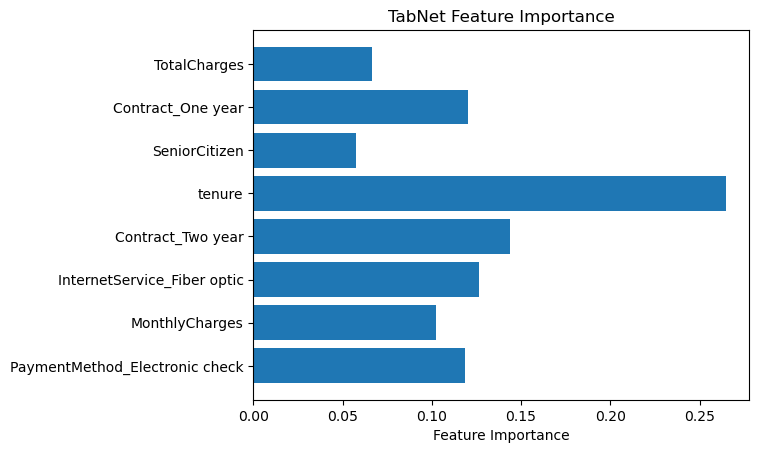

In [89]:
import matplotlib.pyplot as plt

# TabNet內建的解釋工具 - 獲取特徵重要性
feature_importances = clf.feature_importances_

# 畫出特徵重要性
plt.barh(X_train_selected.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('TabNet Feature Importance')
plt.show()

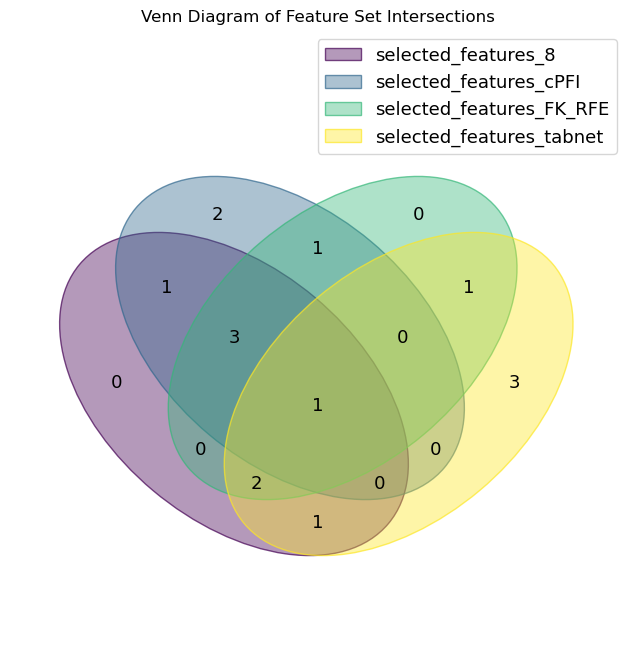

In [65]:
from venn import venn
import matplotlib.pyplot as plt

# 定義四組特徵集
selected_features_8 = {'Contract_Two year', 'MonthlyCharges', 'InternetService_Fiber optic', 'tenure', 
                       'PaymentMethod_Electronic check', 'TotalCharges', 'SeniorCitizen', 'Contract_One year'}
selected_features_cPFI = {'TotalCharges', 'tenure', 'InternetService_Fiber optic', 'SeniorCitizen', 
                          'gender', 'MultipleLines', 'PaperlessBilling', 'PaymentMethod_Electronic check'}
selected_features_FK_RFE = {'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 
                            'InternetService_Fiber optic', 'InternetService_No', 'Contract_Two year', 
                            'PaymentMethod_Electronic check'}
selected_features_tabnet = {'Dependents', 'OnlineSecurity', 'InternetService_No', 'PaymentMethod_Mailed check', 
                            'Contract_One year', 'MonthlyCharges', 'tenure', 'Contract_Two year'}

# 設定Venn圖數據
venn_data = {
    'selected_features_8': selected_features_8,
    'selected_features_cPFI': selected_features_cPFI,
    'selected_features_FK_RFE': selected_features_FK_RFE,
    'selected_features_tabnet': selected_features_tabnet
}

# 繪製 Venn 圖
venn(venn_data)
plt.title("Venn Diagram of Feature Set Intersections")
plt.show()

In [73]:
# 定義四組特徵集
selected_features_8 = {'Contract_Two year', 'MonthlyCharges', 'InternetService_Fiber optic', 'tenure', 
                       'PaymentMethod_Electronic check', 'TotalCharges', 'SeniorCitizen', 'Contract_One year'}
selected_features_cPFI = {'TotalCharges', 'tenure', 'InternetService_Fiber optic', 'SeniorCitizen', 
                          'gender', 'MultipleLines', 'PaperlessBilling', 'PaymentMethod_Electronic check'}
selected_features_FK_RFE = {'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 
                            'InternetService_Fiber optic', 'InternetService_No', 'Contract_Two year', 
                            'PaymentMethod_Electronic check'}
selected_features_tabnet = {'Dependents', 'OnlineSecurity', 'InternetService_No', 'PaymentMethod_Mailed check', 
                            'Contract_One year', 'MonthlyCharges', 'tenure', 'Contract_Two year'}

# 計算交集
# 四者交集
four_way_intersection = selected_features_8 & selected_features_cPFI & selected_features_FK_RFE & selected_features_tabnet

# 任意三者交集
three_way_intersections_no_four_way = {
    '8, cPFI, FK_RFE': (selected_features_8 & selected_features_cPFI & selected_features_FK_RFE) - four_way_intersection,
    '8, cPFI, tabnet': (selected_features_8 & selected_features_cPFI & selected_features_tabnet) - four_way_intersection,
    '8, FK_RFE, tabnet': (selected_features_8 & selected_features_FK_RFE & selected_features_tabnet) - four_way_intersection,
    'cPFI, FK_RFE, tabnet': (selected_features_cPFI & selected_features_FK_RFE & selected_features_tabnet) - four_way_intersection
}


# 任意兩者交集
two_way_intersections = {
    '8, cPFI': selected_features_8 & selected_features_cPFI,
    '8, FK_RFE': selected_features_8 & selected_features_FK_RFE,
    '8, tabnet': selected_features_8 & selected_features_tabnet,
    'cPFI, FK_RFE': selected_features_cPFI & selected_features_FK_RFE,
    'cPFI, tabnet': selected_features_cPFI & selected_features_tabnet,
    'FK_RFE, tabnet': selected_features_FK_RFE & selected_features_tabnet
}

# 只有一種方式選出的特徵（不在其他集合的交集中）
only_in_one = {
    'selected_features_8_only': selected_features_8 - (selected_features_cPFI | selected_features_FK_RFE | selected_features_tabnet),
    'selected_features_cPFI_only': selected_features_cPFI - (selected_features_8 | selected_features_FK_RFE | selected_features_tabnet),
    'selected_features_FK_RFE_only': selected_features_FK_RFE - (selected_features_8 | selected_features_cPFI | selected_features_tabnet),
    'selected_features_tabnet_only': selected_features_tabnet - (selected_features_8 | selected_features_cPFI | selected_features_FK_RFE)
}

# 輸出結果
print("四者交集特徵: ", four_way_intersection)
print("\n修正後的任意三者交集特徵 (去除四者交集): ")
for key, value in three_way_intersections_no_four_way.items():
    print(f"{key}: {value}")

print("\n任意兩者交集特徵: ")
for key, value in two_way_intersections.items():
    print(f"{key}: {value}")

print("\n只有一種方式選出的特徵: ")
for key, value in only_in_one.items():
    print(f"{key}: {value}")

四者交集特徵:  {'tenure'}

修正後的任意三者交集特徵 (去除四者交集): 
8, cPFI, FK_RFE: {'InternetService_Fiber optic', 'TotalCharges', 'PaymentMethod_Electronic check'}
8, cPFI, tabnet: set()
8, FK_RFE, tabnet: {'MonthlyCharges', 'Contract_Two year'}
cPFI, FK_RFE, tabnet: set()

任意兩者交集特徵: 
8, cPFI: {'SeniorCitizen', 'InternetService_Fiber optic', 'TotalCharges', 'PaymentMethod_Electronic check', 'tenure'}
8, FK_RFE: {'InternetService_Fiber optic', 'TotalCharges', 'MonthlyCharges', 'PaymentMethod_Electronic check', 'tenure', 'Contract_Two year'}
8, tabnet: {'Contract_One year', 'MonthlyCharges', 'tenure', 'Contract_Two year'}
cPFI, FK_RFE: {'PaperlessBilling', 'InternetService_Fiber optic', 'TotalCharges', 'PaymentMethod_Electronic check', 'tenure'}
cPFI, tabnet: {'tenure'}
FK_RFE, tabnet: {'InternetService_No', 'MonthlyCharges', 'tenure', 'Contract_Two year'}

只有一種方式選出的特徵: 
selected_features_8_only: set()
selected_features_cPFI_only: {'MultipleLines', 'gender'}
selected_features_FK_RFE_only: set()
selected_fea

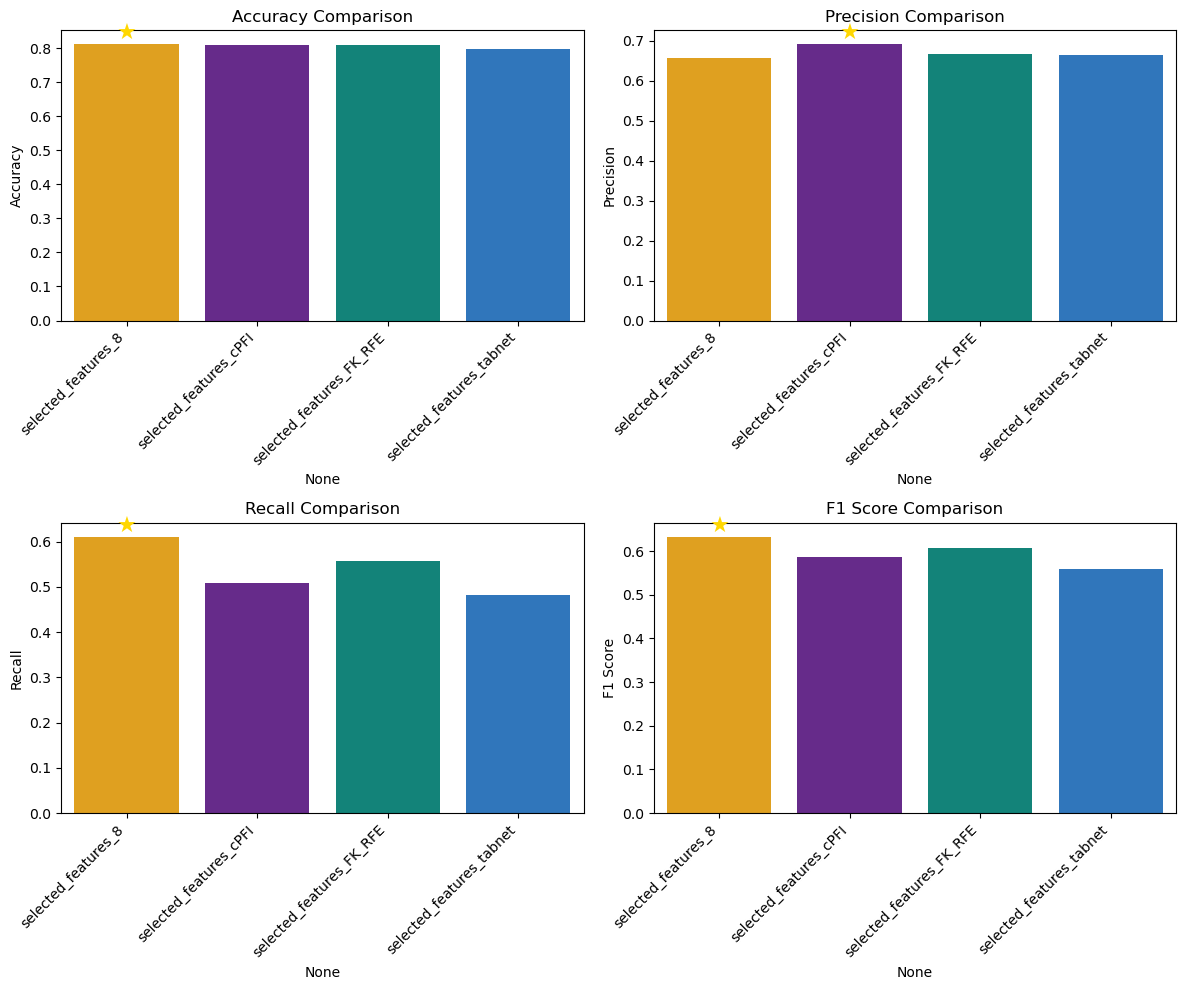

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 將結果轉換成 DataFrame 格式
data = {
    "selected_features_8": [0.812633, 0.657061, 0.611260, 0.633333],
    "selected_features_cPFI": [0.809794, 0.690909, 0.509383, 0.586420],
    "selected_features_FK_RFE": [0.809084, 0.666667, 0.557641, 0.607299],
    "selected_features_tabnet": [0.798439, 0.664207, 0.482574, 0.559006]
}

# 將指標名稱作為行標籤
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
df = pd.DataFrame(data, index=metrics)

# 視覺化
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 定義顏色
colors = ['#FFAB00', '#6A1B9A', '#009688', '#1976D2']

# 繪製每一個指標
for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    sns.barplot(x=df.columns, y=df.loc[metric], ax=ax, hue=df.columns, palette=colors, legend=False)

    # 設置x軸刻度
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=45, ha='right', fontsize=10)

    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    
    # 加入金星標註最優值
    best_idx = df.loc[metric].idxmax()
    ax.text(best_idx, df.loc[metric].max(), '★', ha='center', va='bottom', fontsize=16, color='gold')

# 調整布局
plt.tight_layout()
plt.show()